In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img = Image.open('Imgs/street.png')
type(img)

PIL.PngImagePlugin.PngImageFile

In [6]:
img_np = np.array(img)
classes = np.unique(img_np)
print(classes)
img_np

[ 2  4  5  8 10 12 14 16 17 19 20 21 22 24 26 30]


array([[ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       ...,
       [10, 10, 17, ..., 30, 30, 30],
       [10, 17, 17, ..., 30, 30, 30],
       [17, 17, 17, ..., 30, 30, 30]], dtype=uint8)

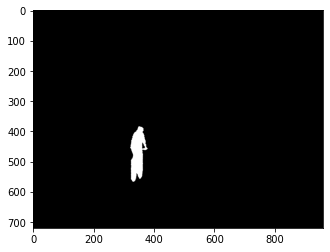

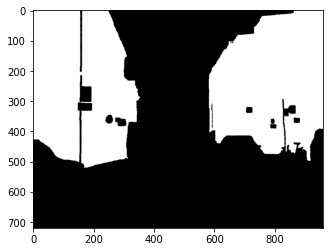

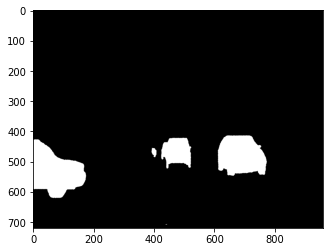

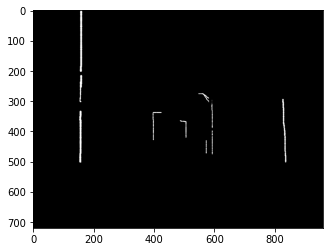

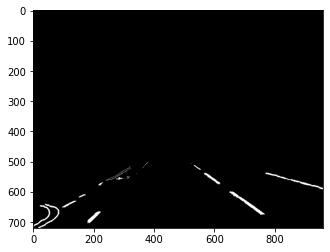

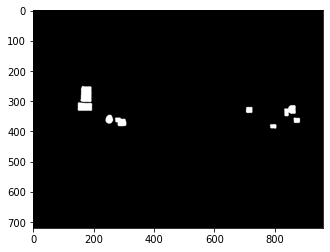

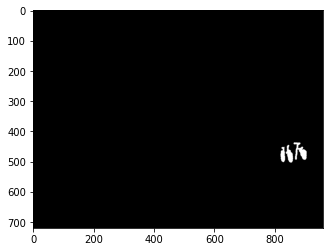

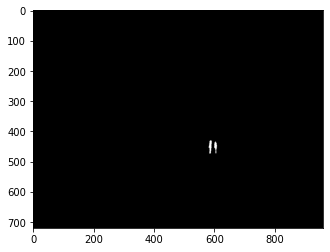

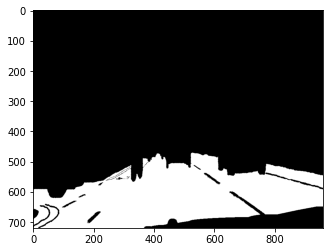

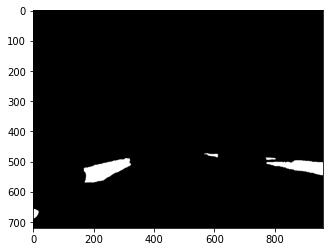

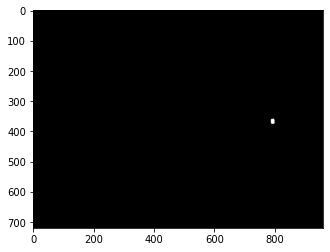

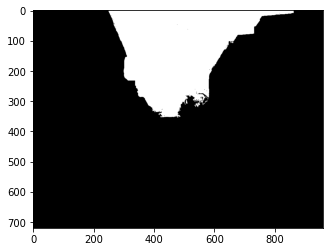

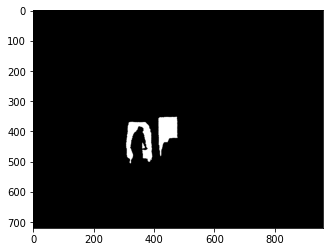

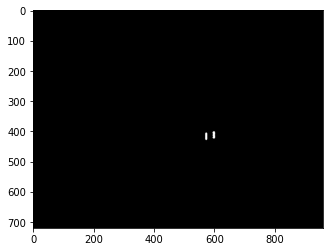

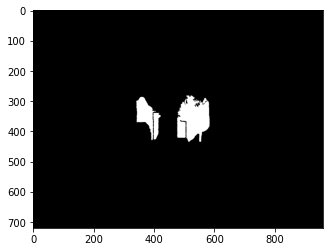

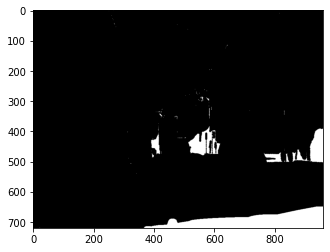

In [8]:
for c in classes:
  img_class = img_np == c
  plt.figure()
  plt.imshow(img_class, 'gray')

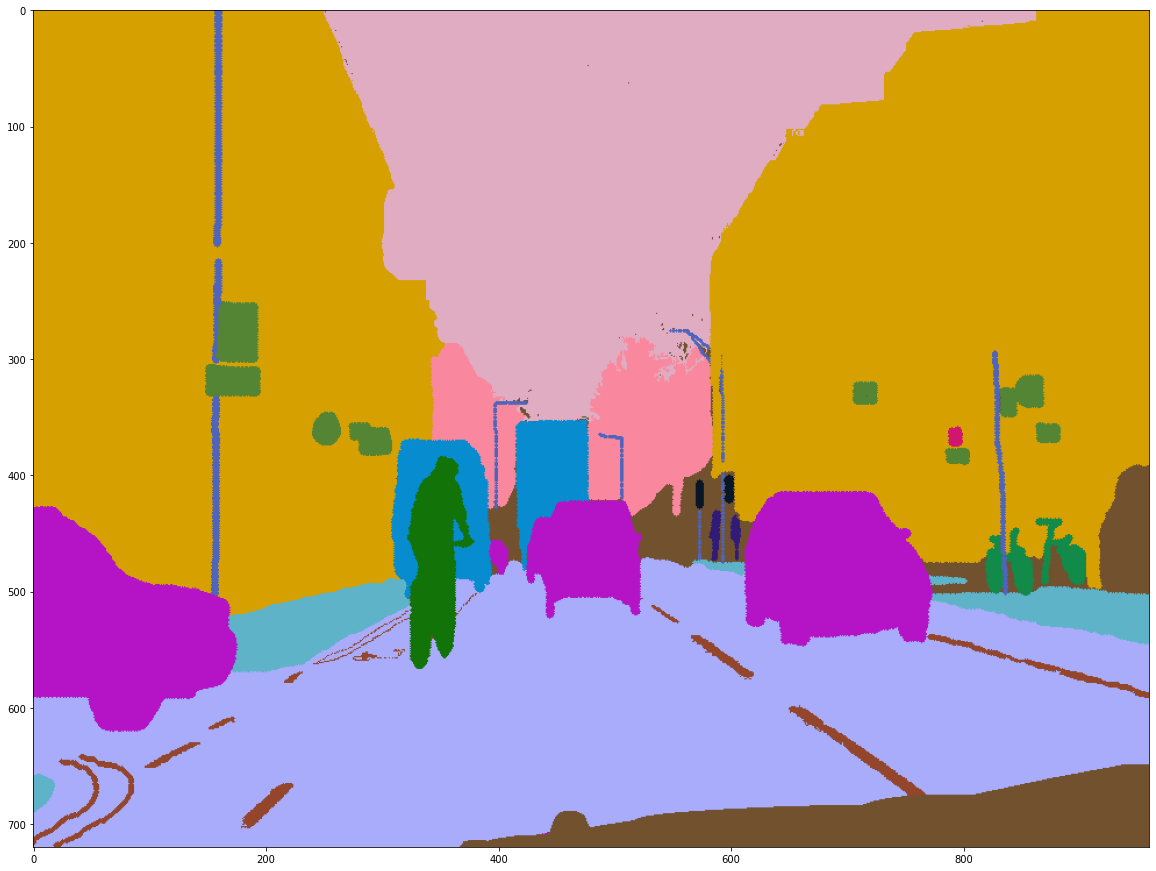

In [11]:
colors = [np.random.randint(0, 256, 3) for _ in classes]
img_colors = np.zeros((img_np.shape[0], img_np.shape[1], 3), dtype=np.uint8)

for c_ind, label in enumerate(classes):
  ind = np.nonzero(img_np == label)
  img_colors[ind[0], ind[1]] = colors[c_ind]

plt.figure(figsize=[20,20])
plt.imshow(img_colors)

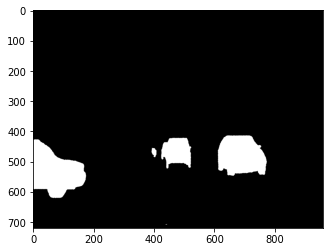

In [15]:
img_bin = img_np == 5
plt.imshow(img_bin, 'gray')

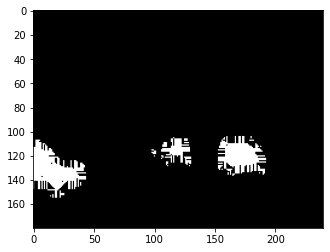

In [16]:
from scipy.ndimage import zoom

img_out = zoom(img_bin, 0.25)
plt.imshow(img_out, 'gray')

In [25]:
def contained(img, set_ee, z):
  for point in set_ee:
    trans_point = (point[0]+z[0], point[1]+z[1])
    if trans_point[0]<0 or trans_point[0]>=img.shape[0] or \
      trans_point[1]<0 or trans_point[1]>=img.shape[1]:
        return False
    if img[trans_point] == 0:
      return False
    
  return True

def erosion(img, elem_est, origin):
  num_rows, num_cols = img.shape
  num_rows_ee, num_cols_ee = elem_est.shape
  set_ee = []
  for row in range(num_rows_ee):
    for col in range(num_cols_ee):
      if elem_est[row, col] == 1:
        set_ee.append((row-origin[0], col-origin[1]))
        
  img_res = np.zeros_like(img)
  
  for row in range(num_rows):
    for col in range(num_cols):
      z = (row, col)
      is_contained = contained(img, set_ee, z)
      if is_contained:
        img_res[row, col] = 1
        
  return img_res
      

In [38]:
def imshow_with_grid(img):
  plt.imshow(img, 'gray')
  plt.xticks(np.arange(-0.5, img.shape[1]+0.5))
  plt.yticks(np.arange(-0.5, img.shape[0]+0.5))
  plt.grid()

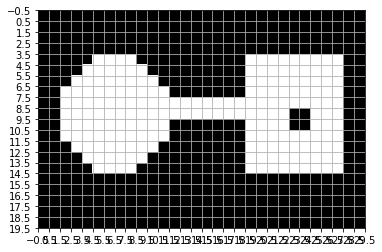

In [44]:
img = plt.imread('Imgs/shape.tiff')
imshow_with_grid(img)

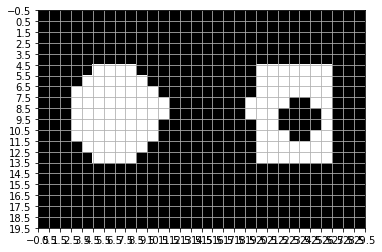

In [45]:
elem_est = np.array(
  [[0, 1, 0],
  [1, 1, 1],
  [0, 1, 0]]
)

img_res = erosion(img, elem_est, origin=(1, 1))

imshow_with_grid(img_res)

In [46]:
def dilation(img, elem_est, origin):
  num_rows, num_cols = img.shape
  num_rows_ee, num_cols_ee = elem_est.shape
  set_ee = []
  
  for row in range(num_rows_ee):
    for col in range(num_cols_ee):
      if elem_est[row, col] == 1:
        set_ee.append((origin[0]-row, origin[1]-col))
        
  img_res = np.zeros_like(img)
  for row in range(num_rows):
    for col in range(num_cols):
      z = (row, col)
      has_intersect = intersects(img, set_ee, z)
      if has_intersect:
        img_res[row, col] = 1
        
  return img_res

def intersects(img, set_ee, z):
  for point in set_ee:
    trans_point = (point[0]+z[0], point[1]+z[1])
    if trans_point[0] >= 0 and trans_point[0] < img.shape[0] and \
      trans_point[1] >= 0 and trans_point[1] < img.shape[1]:
        
        if img[trans_point] == 1:
          return True
  
  return False

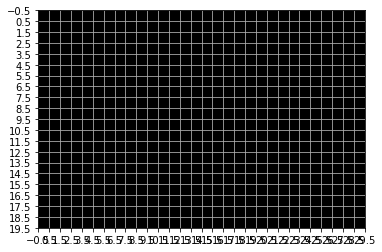

In [47]:
img_res = dilation(img, elem_est, (1, 1))
imshow_with_grid(img_res)

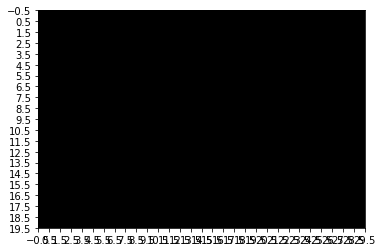

In [49]:
def opening(img, elem_est, origin):
  img_eroded = erosion(img, elem_est, origin)
  img_opened = dilation(img_eroded, elem_est, origin)
  
  return img_opened

def closing(img, elem_est, origin):
  img_dilated = dilation(img, elem_est, origin)
  img_closed = erosion(img_dilated, elem_est, origin)
  
  return img_closed


img_res = opening(img, elem_est, (1, 1))
imshow_with_grid(img_res)

img_res = closing(img, elem_est, (1, 1))
imshow_with_grid(img_res)